In [1]:
import sys
import os
# 获取套件的路径
package_path = os.path.join(os.getcwd(), '/Users/chieray/TMBA-ATD-coding/因子研究/python')  # 替换为你套件的实际路径
sys.path.append('/Users/chieray/TMBA-ATD-coding/因子研究/python')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # 添加这行
from scipy.cluster import hierarchy as sch
from scipy.spatial.distance import squareform
from scipy import stats
import statsmodels.api as sm
from scipy.optimize import minimize
import alpha_researcher

Handler |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (3287742.67/s) 
factor_generator |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (3636364.81/s) 
super_factor_generator |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (4606597.88/s) 
factor_prehandle |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (3413902.95/s) 
factor_merge_valuation |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (4642307.66/s) 
factor_merger |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (4948290.03/s) 
factor_valuation |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (4705881.97/s) 
macro_economic |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 100% [100/100] in 0.0s (4293319.73/s) 


In [2]:
Handler=alpha_researcher.Handler(path='/Users/chieray/TMBA-ATD-coding/因子研究/notebook/Handler_cache_max')
factor_generator=alpha_researcher.factor_generator(period=252)
super_factor_generatorr=alpha_researcher.super_factor_generator(period=252)
factor_prehandle=alpha_researcher.factor_prehandle(clip=3)

In [3]:
def resample_to_period(df, period):
    df['datetime'] = df.index
    df = df.groupby(df.index.to_period(period)).apply(lambda x: x.iloc[-1])
    df.index = df['datetime']
    df = df.drop(columns=['datetime'])
    return df

In [4]:
period='W'

In [5]:
buy_fee=0.001425*0.25
sell_fee=0.001425*0.25+0.003

# 導入資料

In [7]:
日資料=pd.read_parquet('/Volumes/Medina_Alpha/PROD_DATA/pmart.parquet')
日資料=日資料.set_index(['datetime','symbol'])
日資料.to_pickle("/Users/chieray/TMBA-ATD-coding/因子研究/data/日資料.pkl")

In [8]:
矩陣資料=日資料.unstack()#.columns.tolist()
矩陣資料.columns = pd.MultiIndex.from_tuples([(lvl0.replace('/', '_'), lvl1) for lvl0, lvl1 in 矩陣資料.columns])

In [9]:
資料列表=矩陣資料.columns.levels[0].unique().tolist()
for 資料名稱 in 資料列表:
    Handler[f'raw:{資料名稱}'] = 矩陣資料[資料名稱]

In [10]:
Handler.cash_list('raw')

['流動比率',
 '單月營收成長率%',
 '月份',
 '商譽及無形資產合計',
 '最低價-除權息',
 '外資買進張數',
 '合計買賣超(千股)',
 '營業毛利成長率',
 '幣別',
 '籌資活動之現金流量',
 '營業收入淨額',
 '近一月報酬率(%)',
 '營業成本',
 '自營總持股數(千股)',
 'EBITDA',
 '每股盈餘_單季',
 '最高價-除權息',
 '每股淨值(F)-TSE公告數',
 '稅後淨利率',
 '投資資本',
 '負債比率',
 '長期資金適合率(A)',
 '自營總持股率(%)',
 '累積營收成長率(%)',
 '合併總損益',
 '最高價',
 '非流動資產',
 '投資活動之現金流量',
 '開盤價-除權息',
 '負債及股東權益總額',
 '近一季報酬率(%)',
 '折舊－CFO',
 '股東權益總額',
 '營業費用',
 '融券維持率',
 '存貨',
 '非流動負債',
 '融資餘額(千元)',
 '投信賣出張數',
 '營業利益成長率',
 '不動產廠房及設備',
 '攤提－CFO',
 '融券使用率',
 '其他長期借款－非流動',
 '速動比率',
 '營運流動資產',
 '近一年報酬率(%)',
 '融券買入(張)',
 '流動資產',
 '來自營運之現金流量',
 '融券賣出(張)',
 '總資產週轉次數',
 '歸屬母公司淨利（損）',
 '營業利益',
 '外資買賣超(千股)',
 '融券餘額(張)',
 '最低價',
 '應收帳款及票據',
 '一年內到期長期負債',
 '外資總持股數(千股)',
 '營業毛利',
 '融資餘額(張)',
 '近一週報酬率(%)',
 '流通股數(千股)',
 '融資買進(張)',
 '去年累積營收(千元)',
 '營業利益率',
 '高低價差',
 '券資比',
 '營收成長率',
 '融資賣出(張)',
 '成交量(千股)',
 '採權益法之長期股權投資',
 '投信買進張數',
 '負債總額',
 '所得稅費用',
 '收盤價',
 '投信總持股數(千股)',
 '速動資產',
 '單季(Q)_單半年(H)',
 '存貨週轉率(次)',
 '交易所本益比',
 '銀行借款－非流動',
 '外資總持股率(%)',
 '短期借款',
 '日報

In [11]:
###手動加資料
Handler['raw:擬制現金']=(Handler['raw:速動比率']/100*Handler['raw:流動負債'])-Handler['raw:應收帳款及票據']
Handler['raw:高低價差']=Handler['raw:最高價']-Handler['raw:最低價']
Handler['raw:高低價差-除權息']=Handler['raw:最高價-除權息']-Handler['raw:最低價-除權息']
Handler['raw:企業價值']=(Handler['raw:流通股數(千股)']*Handler['raw:收盤價'])+Handler['raw:負債總額']-Handler['raw:擬制現金']
Handler['raw:EBITDA']=Handler['raw:歸屬母公司淨利（損）']+Handler['raw:折舊－CFO']+Handler['raw:攤提－CFO']+Handler['raw:所得稅費用']
Handler['raw:EBIT']=Handler['raw:歸屬母公司淨利（損）']+Handler['raw:所得稅費用']
Handler['raw:投資資本']=Handler['raw:不動產廠房及設備']+Handler['raw:商譽及無形資產合計']+Handler['raw:流動資產']-Handler['raw:流動負債']-Handler['raw:擬制現金']
Handler['raw:其他資產']=Handler['raw:非流動資產']-Handler['raw:不動產廠房及設備']
Handler['raw:營運流動資產']=Handler['raw:流動資產']-Handler['raw:擬制現金']
Handler['raw:營運流動負債']=Handler['raw:流動負債']-Handler['raw:短期借款']
Handler['raw:速動資產']=Handler['raw:流動資產']-Handler['raw:存貨']

# 計算參數

In [12]:
調整後開盤價=Handler['raw:開盤價-除權息'].shift(-1)
預期收益率＿日=(調整後開盤價.shift(-1)/調整後開盤價)-1
預期收益率＿周=(調整後開盤價.shift(-5)/調整後開盤價)-1
預期收益率＿月=(調整後開盤價.shift(-22)/調整後開盤價)-1

In [13]:
def get_tsx_weights():
    tsx_components = pd.read_parquet(os.path.join('/Volumes/Medina_Alpha/PROD_DATA/', 'twii_components.parquet'))
    tsx_components['pre_cap_weighting'] = tsx_components['pre_cap_weighting'] / 100
    tsx_components['symbol'] = tsx_components['symbol'].str.split(' ').str[0]
    tsx_components = tsx_components.sort_values(by=['datetime', 'symbol']).drop_duplicates(subset=['datetime', 'symbol'], keep='last')
    tsx_components = tsx_components.set_index(['datetime', 'symbol'])
    tsx_weights = tsx_components['pre_cap_weighting'].unstack()
    return tsx_weights

In [14]:
####建立初始股池
cap=Handler['raw:收盤價']*Handler['raw:流通股數(千股)']
加權指數比例=get_tsx_weights()
上市布林值=加權指數比例.notna()
cap_rank = cap[上市布林值].rank(axis=1, pct=True, ascending=True) 
portfolio_pool = (cap_rank > 0.5) & (cap_rank < 0.9)

In [15]:
portfolio_pool

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-02,False,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2013-01-03,False,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2013-01-04,False,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2013-01-07,False,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2013-01-08,False,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,False,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2025-03-03,False,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2025-03-04,False,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


# 計算因子

In [16]:
Handler.cash_list('raw')

['流動比率',
 '單月營收成長率%',
 '月份',
 '商譽及無形資產合計',
 '最低價-除權息',
 '外資買進張數',
 '合計買賣超(千股)',
 '營業毛利成長率',
 '幣別',
 '籌資活動之現金流量',
 '營業收入淨額',
 '近一月報酬率(%)',
 '營業成本',
 '自營總持股數(千股)',
 'EBITDA',
 '每股盈餘_單季',
 '最高價-除權息',
 '每股淨值(F)-TSE公告數',
 '稅後淨利率',
 '投資資本',
 '負債比率',
 '長期資金適合率(A)',
 '自營總持股率(%)',
 '累積營收成長率(%)',
 '合併總損益',
 '最高價',
 '非流動資產',
 '投資活動之現金流量',
 '開盤價-除權息',
 '負債及股東權益總額',
 '近一季報酬率(%)',
 '折舊－CFO',
 '股東權益總額',
 '營業費用',
 '融券維持率',
 '存貨',
 '非流動負債',
 '融資餘額(千元)',
 '投信賣出張數',
 '營業利益成長率',
 '不動產廠房及設備',
 '攤提－CFO',
 '融券使用率',
 '其他長期借款－非流動',
 '速動比率',
 '營運流動資產',
 '近一年報酬率(%)',
 '融券買入(張)',
 '流動資產',
 '來自營運之現金流量',
 '融券賣出(張)',
 '總資產週轉次數',
 '歸屬母公司淨利（損）',
 '營業利益',
 '外資買賣超(千股)',
 '融券餘額(張)',
 '最低價',
 '應收帳款及票據',
 '一年內到期長期負債',
 '外資總持股數(千股)',
 '營業毛利',
 '融資餘額(張)',
 '近一週報酬率(%)',
 '流通股數(千股)',
 '融資買進(張)',
 '去年累積營收(千元)',
 '營業利益率',
 '高低價差',
 '券資比',
 '營收成長率',
 '融資賣出(張)',
 '成交量(千股)',
 '採權益法之長期股權投資',
 '投信買進張數',
 '負債總額',
 '所得稅費用',
 '收盤價',
 '投信總持股數(千股)',
 '速動資產',
 '單季(Q)_單半年(H)',
 '存貨週轉率(次)',
 '交易所本益比',
 '銀行借款－非流動',
 '外資總持股率(%)',
 '短期借款',
 '日報

In [17]:
損益資料=Handler.combine_data(['來自營運之現金流量', '合併總損益','所得稅費用','籌資活動之現金流量','累積營收(千元)','去年單月營收(千元)','營業費用','每股盈餘_單季','營業收入淨額','營業外收入及支出','折舊－CFO','營業毛利','每股盈餘','營業利益','營業成本','單月營收(千元)','攤提－CFO','CFO_合併總損益','歸屬母公司淨利（損）'], category='raw')
股價資料=Handler.combine_data(['收盤價','最低價-除權息','開盤價','最高價','收盤價-除權息','開盤價-除權息','最低價','近一月報酬率(%)','交易所淨值市價比','近一週報酬率(%)','日報酬率(%)','近一年報酬率(%)','近一季報酬率(%)','高低價差-除權息','高低價差'],category='raw')
營業效率資料=Handler.combine_data(['應收帳款週轉次數','ROE(A)-稅後','ROA(C) 稅前息前折舊前','存貨週轉率(次)','總資產週轉次數'],category='raw')
損益結構資料=Handler.combine_data(['現金流量比率','營業毛利率','稅後淨利率','營業利益率'],category='raw')
資產負債表資料=Handler.combine_data(['採權益法之長期股權投資','短期借款','負債及股東權益總額','應付商業本票∕承兌匯票','其他長期借款－非流動','流動負債','長期資金適合率(A)','流動資產','股本','流動比率','不動產廠房及設備','速動比率','每股淨值(F)-TSE公告數','交易所本益比','存貨','負債總額','非流動負債','資產總額','非流動資產','銀行借款－非流動','CFO_負債','應收帳款及票據','一年內到期長期負債','股東權益總額','應付公司債－非流動','商譽及無形資產合計','保留盈餘','負債比率'],category='raw')
籌碼資料=Handler.combine_data(['自營總持股數(千股)','融資使用率','投信賣出張數','投信總持股率(%)','融資餘額(張)','外資總持股數(千股)','自營總持股率(%)','外資賣出張數','自營買進張數','合計買賣超(千股)','融資餘額(千元)','外資買進張數','外資買賣超(千股)','券資比', '融資維持率','外資總持股率(%)','自營賣出張數','融券使用率','融券餘額(千元)','融券賣出(張)','投信買賣超(千股)','融券維持率','整戶維持率','融券買入(張)','投信總持股數(千股)','融資賣出(張)','自營買賣超(千股)','投信買進張數','融資買進(張)','融券餘額(張)'],category='raw')

In [18]:
###盈利因子
Handler['factor:投資資本收益率']=Handler['raw:EBIT']/Handler['raw:投資資本']
Handler['factor:毛利資產比']=Handler['raw:營業毛利']/Handler['raw:資產總額']
Handler['factor:營業利潤率']=Handler['raw:營業利益']/Handler['raw:股東權益總額']
Handler['factor:資產收益率']=Handler['raw:ROA(C) 稅前息前折舊前']
Handler['factor:淨資產收益率']=Handler['raw:ROE(A)-稅後']
Handler['factor:毛利潤']=Handler['raw:營業毛利']/Handler['raw:單月營收(千元)']
Handler['factor:資產周轉率']=Handler['raw:單月營收(千元)']/(Handler['raw:資產總額'].rolling(252).mean())
#Handler['factor:profitability']=(Handler['raw:每股盈餘']) / (Handler['raw:收盤價'])###幹這個是價值因子......
Handler['factor:ocf_ratio']=Handler['raw:來自營運之現金流量'] / cap

In [19]:
###估值因子需要產業中性化(拿產業指數去篩)
Handler['factor:靜態市盈率']=  Handler['raw:每股盈餘']/Handler['raw:收盤價']#.mask(Handler['raw:每股盈餘'] < 0,0.0000001)
Handler['factor:拖尾市盈率']=Handler['raw:每股盈餘'].rolling(252).mean()/Handler['raw:收盤價'] 
Handler['factor:市盈增長率']=Handler['factor:靜態市盈率']/(((Handler['raw:每股盈餘']-Handler['raw:每股盈餘'].shift(252*3))/abs(Handler['raw:每股盈餘'].shift(252*3))+1)** (1/3) - 1)
Handler['factor:市淨率']=Handler['raw:每股淨值(F)-TSE公告數']/Handler['raw:收盤價']
Handler['factor:市銷率']=Handler['raw:單月營收(千元)']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價'])
Handler['factor:企業價值倍數']=Handler['raw:EBITDA']/Handler['raw:企業價值']
Handler['factor:營業利益回報率']=Handler['raw:營業利益']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價'])

#Handler['factor:靜態市盈率_重構後']=factor_prehandle.Neutralization(np.log(1+Handler['raw:每股盈餘']),np.log(1+Handler['raw:收盤價']))


In [20]:
###價量因子
Handler['factor:股價最高比值＿一年']=Handler['raw:收盤價']/Handler['raw:收盤價'].rolling(252).max()
Handler['factor:歷史最高比值']=Handler['raw:收盤價'] / Handler['raw:收盤價'].cummax()
Handler['factor:長短均線比值']=Handler['raw:收盤價'].rolling(50).mean()/Handler['raw:收盤價'].rolling(250).mean()
Handler['factor:價格意圖因子']=((Handler['raw:收盤價']/Handler['raw:收盤價'].shift(60)-1)/abs(Handler['raw:收盤價']/Handler['raw:收盤價'].shift(1)-1).rolling(60).sum())
Handler['factor:開盤跳空因子']=Handler['raw:開盤價']/Handler['raw:開盤價'].shift(1)


In [21]:
###投融資決策
Handler['factor:總資產增長率']=(Handler['raw:資產總額']-Handler['raw:資產總額'].shift(252))/Handler['raw:資產總額'].shift(252)
Handler['factor:流動資產增長率']=(Handler['raw:流動資產']-Handler['raw:流動資產'].shift(252))/Handler['raw:流動資產'].shift(252)
Handler['factor:固定增產增長率']=(Handler['raw:不動產廠房及設備']-Handler['raw:不動產廠房及設備'].shift(252))/Handler['raw:不動產廠房及設備'].shift(252)
Handler['factor:其他資產增長率']=(Handler['raw:其他資產']-Handler['raw:其他資產'].shift(252))/Handler['raw:其他資產'].shift(252)
Handler['factor:超額資本支出']=Handler['raw:投資活動之現金流量']/(Handler['raw:投資活動之現金流量'].shift(252).rolling(252*3).mean())
Handler['factor:淨營運資本變動']=((Handler['raw:營運流動資產']-Handler['raw:營運流動負債'])-(Handler['raw:營運流動資產']-Handler['raw:營運流動負債']).shift(252))/(Handler['raw:營運流動資產']-Handler['raw:營運流動負債']).shift(252)
Handler['factor:庫存增長']=(Handler['raw:存貨']-Handler['raw:存貨'].shift(252))/(Handler['raw:資產總額'].rolling(252).mean())
Handler['factor:可持續增長']=(Handler['raw:股東權益總額']-Handler['raw:股東權益總額'].shift(252))/(Handler['raw:股東權益總額'].shift(252))
Handler['factor:投資增長率']=(Handler['raw:投資活動之現金流量']-Handler['raw:投資活動之現金流量'].shift(252))/(Handler['raw:投資活動之現金流量'].shift(252))
Handler['factor:投資與資本比']=Handler['raw:投資活動之現金流量']/(Handler['raw:不動產廠房及設備'].shift(66))
Handler['factor:投資與資產比']=((Handler['raw:不動產廠房及設備']-Handler['raw:不動產廠房及設備'].shift(252))+(Handler['raw:存貨']-Handler['raw:存貨'].shift(252)))/(Handler['raw:資產總額'].shift(252))
Handler['factor:槓桿率']=Handler['raw:負債總額']/Handler['raw:股東權益總額']
Handler['factor:銷售創高增長']=((Handler['raw:單月營收(千元)']-Handler['raw:單月營收(千元)'].shift(252))/(Handler['raw:單月營收(千元)'].shift(252))).rolling(252).rank(pct=True)

In [22]:
###成長因子
Handler['factor:資產周轉率變化']=(Handler['factor:資產周轉率']-Handler['factor:資產周轉率'].shift(252))
Handler['factor:對數資產周轉率變化']=(np.log(Handler['factor:資產周轉率'])-np.log(Handler['factor:資產周轉率']).shift(252))
Handler['factor:銷售增長']=(Handler['raw:單月營收(千元)']-Handler['raw:單月營收(千元)'].shift(252))/abs(Handler['raw:單月營收(千元)'].shift(252))
Handler['factor:銷售增長與庫存增長之差']=Handler['factor:銷售增長']-Handler['factor:庫存增長']

Handler['factor:投資資本收益率變化']=Handler['factor:投資資本收益率']/Handler['factor:投資資本收益率'].shift(252)-1
Handler['factor:毛利資產比變化']=Handler['factor:毛利資產比']/Handler['factor:毛利資產比'].shift(252)-1
Handler['factor:營業利潤率變化']=Handler['factor:營業利潤率']/Handler['factor:營業利潤率'].shift(252)-1
Handler['factor:資產收益率變化']=Handler['factor:資產收益率']/Handler['factor:資產收益率'].shift(252)-1
Handler['factor:淨資產收益率變化']=Handler['factor:淨資產收益率']/Handler['factor:淨資產收益率'].shift(252)-1
Handler['factor:毛利潤變化']=Handler['factor:毛利潤']/Handler['factor:毛利潤'].shift(252)-1
Handler['factor:資產周轉率變化']=Handler['factor:資產周轉率']/Handler['factor:資產周轉率'].shift(252)-1

/Users/chieray/TMBA-ATD-coding/因子研究/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/chieray/TMBA-ATD-coding/因子研究/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/chieray/TMBA-ATD-coding/因子研究/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/chieray/TMBA-ATD-coding/因子研究/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [23]:
###未預期因子
單月營收=Handler['raw:單月營收(千元)']
yoy=(單月營收-單月營收.shift(252))
Handler['factor:標準化未預期營收']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
營餘=Handler['raw:歸屬母公司淨利（損）']
yoy=(營餘-營餘.shift(252))
Handler['factor:標準化未預期營餘']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())

yoy=(Handler['factor:投資資本收益率']-Handler['factor:投資資本收益率'].shift(252))
Handler['factor:標準化未預期投資資本收益率']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:毛利資產比']-Handler['factor:毛利資產比'].shift(252))
Handler['factor:標準化未預期毛利資產比']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:營業利潤率']-Handler['factor:營業利潤率'].shift(252))
Handler['factor:標準化未預期營業利潤率']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:資產收益率']-Handler['factor:資產收益率'].shift(252))
Handler['factor:標準化未預期資產收益率']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:淨資產收益率']-Handler['factor:淨資產收益率'].shift(252))
Handler['factor:標準化未預期淨資產收益率']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:毛利潤']-Handler['factor:毛利潤'].shift(252))
Handler['factor:標準化未預期毛利潤']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())
yoy=(Handler['factor:資產周轉率']-Handler['factor:資產周轉率'].shift(252))
Handler['factor:標準化未預期資產周轉率']=(yoy-yoy.rolling(252, min_periods=1).mean())/(yoy.rolling(252, min_periods=1).std())

In [24]:
###盈餘品質
Handler['factor:應計利潤']=(((Handler['raw:營運流動資產']-Handler['raw:營運流動負債'])-(Handler['raw:營運流動資產']-Handler['raw:營運流動負債']).shift(252))-Handler['raw:折舊－CFO'])/(Handler['raw:資產總額'].rolling(252).mean())
Handler['factor:盈餘品質']=Handler['raw:來自營運之現金流量']/Handler['raw:歸屬母公司淨利（損）']
Handler['factor:dividend_quality']=((Handler['raw:每股盈餘'])/((Handler['raw:現金股利率'])  * 0.01 * Handler['raw:收盤價']))[Handler['raw:現金股利率']>5]

In [25]:
###外資因子
Handler['raw:外資總持股數(千股)']=Handler['raw:外資總持股數(千股)'].fillna(0.0001)
Handler['raw:外資買賣超(千股)']=Handler['raw:外資買賣超(千股)'].fillna(0.0001)
Handler['raw:外資買進張數']=Handler['raw:外資買進張數'].fillna(0.0001)


Handler['factor:外資持倉市值']=Handler['raw:外資總持股數(千股)']*Handler['raw:收盤價']
Handler['factor:外資配置比例']=Handler['factor:外資持倉市值'].div(Handler['factor:外資持倉市值'].sum(axis=1),axis=0)
Handler['factor:外資持倉月增量']=(Handler['factor:外資持倉市值']-Handler['factor:外資持倉市值'].shift(22))/abs(Handler['factor:外資持倉市值'].shift(22))
Handler['factor:外資配置月增量']=(Handler['factor:外資配置比例']-Handler['factor:外資配置比例'].shift(22))/abs(Handler['factor:外資配置比例'].shift(22))

Handler['factor:外資月淨流入']=(Handler['raw:外資買賣超(千股)']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:外資月淨流入占期初持倉比']=Handler['factor:外資月淨流入']/Handler['factor:外資持倉市值'].shift(22)
Handler['factor:外資月淨流入占流通市值比']=Handler['factor:外資月淨流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()
Handler['factor:外資月正流入天數佔比']=Handler['factor:外資月淨流入'].rolling(22).apply(lambda x: (x > 0).sum() / len(x), raw=True)
Handler['factor:外資月正向流入']=(Handler['raw:外資買進張數']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:外資月正向流入占期初持倉比']=Handler['factor:外資月正向流入']/Handler['factor:外資持倉市值'].shift(22)
Handler['factor:外資月正向流入占流通市值比']=Handler['factor:外資月正向流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()

Handler['factor:外資月淨流入環比增幅']=Handler['factor:外資月淨流入']/Handler['factor:外資月淨流入'].shift(22)-1
Handler['factor:外資月淨流入占期初持倉比環比增幅']=Handler['factor:外資月淨流入占期初持倉比']/Handler['factor:外資月淨流入占期初持倉比'].shift(22)-1
Handler['factor:外資月淨流入占流通市值比環比增幅']=Handler['factor:外資月淨流入占流通市值比']/Handler['factor:外資月淨流入占流通市值比'].shift(22)-1
Handler['factor:外資月正向流入環比增幅']=Handler['factor:外資月正向流入']/Handler['factor:外資月正向流入'].shift(22)-1
Handler['factor:外資月正向流入占流通市值比環比增幅']=Handler['factor:外資月正向流入占流通市值比']/Handler['factor:外資月正向流入占流通市值比'].shift(22)-1

In [26]:
###投信因子
Handler['raw:投信總持股數(千股)']=Handler['raw:投信總持股數(千股)'].fillna(0.0001)
Handler['raw:投信買賣超(千股)']=Handler['raw:投信買賣超(千股)'].fillna(0.0001)
Handler['raw:投信買進張數']=Handler['raw:投信買進張數'].fillna(0.0001)

Handler['factor:投信持倉市值']=Handler['raw:投信總持股數(千股)']*Handler['raw:收盤價']
Handler['factor:投信配置比例']=Handler['factor:投信持倉市值'].div(Handler['factor:投信持倉市值'].sum(axis=1),axis=0)
Handler['factor:投信持倉月增量']=(Handler['factor:投信持倉市值']-Handler['factor:投信持倉市值'].shift(22))/abs(Handler['factor:投信持倉市值'].shift(22))
Handler['factor:投信配置月增量']=(Handler['factor:投信配置比例']-Handler['factor:投信配置比例'].shift(22))/abs(Handler['factor:投信配置比例'].shift(22))

Handler['factor:投信月淨流入']=(Handler['raw:投信買賣超(千股)']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:投信月淨流入占期初持倉比']=Handler['factor:投信月淨流入']/Handler['factor:投信持倉市值'].shift(22)
Handler['factor:投信月淨流入占流通市值比']=Handler['factor:投信月淨流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()
Handler['factor:投信月正流入天數佔比']=Handler['factor:投信月淨流入'].rolling(22).apply(lambda x: (x > 0).sum() / len(x), raw=True)
Handler['factor:投信月正向流入']=(Handler['raw:投信買進張數']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:投信月正向流入占期初持倉比']=Handler['factor:投信月正向流入']/Handler['factor:投信持倉市值'].shift(22)
Handler['factor:投信月正向流入占流通市值比']=Handler['factor:投信月正向流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()

Handler['factor:投信月淨流入環比增幅']=Handler['factor:投信月淨流入']/Handler['factor:投信月淨流入'].shift(22)-1
Handler['factor:投信月淨流入占期初持倉比環比增幅']=Handler['factor:投信月淨流入占期初持倉比']/Handler['factor:投信月淨流入占期初持倉比'].shift(22)-1
Handler['factor:投信月淨流入占流通市值比環比增幅']=Handler['factor:投信月淨流入占流通市值比']/Handler['factor:投信月淨流入占流通市值比'].shift(22)-1
Handler['factor:投信月正向流入環比增幅']=Handler['factor:投信月正向流入']/Handler['factor:投信月正向流入'].shift(22)-1
Handler['factor:投信月正向流入占流通市值比環比增幅']=Handler['factor:投信月正向流入占流通市值比']/Handler['factor:投信月正向流入占流通市值比'].shift(22)-1

In [27]:
###自營商因子
Handler['raw:自營總持股數(千股)']=Handler['raw:自營總持股數(千股)'].fillna(0.0001)
Handler['raw:自營買賣超(千股)']=Handler['raw:自營買賣超(千股)'].fillna(0.0001)
Handler['raw:自營買進張數']=Handler['raw:自營買進張數'].fillna(0.0001)

Handler['factor:自營持倉市值']=Handler['raw:自營總持股數(千股)']*Handler['raw:收盤價']
Handler['factor:自營配置比例']=Handler['factor:自營持倉市值'].div(Handler['factor:自營持倉市值'].sum(axis=1),axis=0)
Handler['factor:自營持倉月增量']=(Handler['factor:自營持倉市值']-Handler['factor:自營持倉市值'].shift(22))/abs(Handler['factor:自營持倉市值'].shift(22))
Handler['factor:自營配置月增量']=(Handler['factor:自營配置比例']-Handler['factor:自營配置比例'].shift(22))/abs(Handler['factor:自營配置比例'].shift(22))

Handler['factor:自營月淨流入']=(Handler['raw:自營買賣超(千股)']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:自營月淨流入占期初持倉比']=Handler['factor:自營月淨流入']/Handler['factor:自營持倉市值'].shift(22)
Handler['factor:自營月淨流入占流通市值比']=Handler['factor:自營月淨流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()
Handler['factor:自營月正流入天數佔比']=Handler['factor:自營月淨流入'].rolling(22).apply(lambda x: (x > 0).sum() / len(x), raw=True)
Handler['factor:自營月正向流入']=(Handler['raw:自營買進張數']*Handler['raw:收盤價']).rolling(22).sum()
Handler['factor:自營月正向流入占期初持倉比']=Handler['factor:自營月正向流入']/Handler['factor:自營持倉市值'].shift(22)
Handler['factor:自營月正向流入占流通市值比']=Handler['factor:自營月正向流入']/(Handler['raw:流通股數(千股)']*Handler['raw:收盤價']).rolling(22).mean()

Handler['factor:自營月淨流入環比增幅']=Handler['factor:自營月淨流入']/Handler['factor:自營月淨流入'].shift(22)-1
Handler['factor:自營月淨流入占期初持倉比環比增幅']=Handler['factor:自營月淨流入占期初持倉比']/Handler['factor:自營月淨流入占期初持倉比'].shift(22)-1
Handler['factor:自營月淨流入占流通市值比環比增幅']=Handler['factor:自營月淨流入占流通市值比']/Handler['factor:自營月淨流入占流通市值比'].shift(22)-1
Handler['factor:自營月正向流入環比增幅']=Handler['factor:自營月正向流入']/Handler['factor:自營月正向流入'].shift(22)-1
Handler['factor:自營月正向流入占流通市值比環比增幅']=Handler['factor:自營月正向流入占流通市值比']/Handler['factor:自營月正向流入占流通市值比'].shift(22)-1

In [28]:
###交易活躍度
Handler['factor:月度雙向交易活躍度']=((Handler['raw:外資買賣超(千股)']*Handler['raw:收盤價']).rolling(22).sum())/((Handler['raw:成交量(千股)']*Handler['raw:收盤價']).rolling(22).sum())
Handler['factor:月度正向交易活躍度']=((Handler['raw:外資買進張數']*Handler['raw:收盤價']).rolling(22).sum())/((Handler['raw:成交量(千股)']*Handler['raw:收盤價']).rolling(22).sum())

總張數=(Handler['raw:投信賣出張數']+Handler['raw:投信買進張數']+Handler['raw:外資賣出張數']+Handler['raw:外資買進張數']+Handler['raw:自營賣出張數']+Handler['raw:自營買進張數'])
總價值=總張數*Handler['raw:收盤價']
Handler['factor:買賣資金變化（75日＿252日）']=總張數.rolling(75).mean()/總價值.rolling(252).mean()
Handler['factor:融資券雙漲']=(Handler['raw:融券餘額(千元)']+Handler['raw:融資餘額(千元)'])/(Handler['raw:融券餘額(千元)']+Handler['raw:融資餘額(千元)']).shift(22)-1

In [29]:
###波動性
Handler['factor:投資資本收益率波動']=Handler['factor:投資資本收益率'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:毛利資產比波動']=Handler['factor:毛利資產比'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:營業利潤率波動']=Handler['factor:營業利潤率'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:資產收益率波動']=Handler['factor:資產收益率'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:淨資產收益率波動']=Handler['factor:淨資產收益率'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:毛利潤波動']=Handler['factor:毛利潤'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:資產周轉率波動']=Handler['factor:資產周轉率'].rolling(252).std()/Handler['raw:股東權益總額']
Handler['factor:流動性波動']=(Handler['raw:流動資產']/Handler['raw:流動負債']).rolling(504).std()
Handler['factor:速動性波動']=(Handler['raw:速動資產']/Handler['raw:流動負債']).rolling(504).std()
Handler['factor:來自營運之現金流量波動']=(Handler['raw:來自營運之現金流量']).rolling(504).std()
Handler['factor:槓桿波動']=(Handler['raw:資產總額']/Handler['raw:負債總額']).rolling(252).std()
Handler['factor:每股盈餘波動']=(Handler['raw:每股盈餘']).rolling(252).std()
Handler['factor:operation_stability_daily ']=(Handler['raw:歸屬母公司淨利（損）'].rolling(504).std())/Handler['raw:股東權益總額']
Handler['factor:volatility']=(Handler['raw:日報酬率(%)'] * 0.01).rolling(252).std()
Handler['factor:sharpe']=((Handler['raw:日報酬率(%)'] * 0.01).rolling(252).mean())/((Handler['raw:日報酬率(%)'] * 0.01).rolling(252).std())
Handler['factor:震幅']=(Handler['raw:收盤價'].rolling(252).max()-Handler['raw:收盤價'].rolling(63).min())/Handler['raw:收盤價']
Handler['factor:價格波動']=Handler['raw:收盤價'].rolling(22).std()


# 因子參數高原(全樣本)

In [30]:
def one_dim_parameter_optimize(參數列表,expreturns):
    performance_dict = {}
    for 參數 in 參數列表:
        price_mom = -1*(Handler['factor:外資持倉市值']-Handler['factor:外資持倉市值'].shift(參數))/abs(Handler['factor:外資持倉市值'].shift(參數))
        demean = price_mom.sub(price_mom.mean(axis=1), axis=0)
        weighting = demean.div(demean.abs().sum(axis=1), axis=0)
        expreturns = expreturns.loc[weighting.index[0]:weighting.index[-1]]
        returns_df = weighting * expreturns
        returns_series = returns_df.sum(axis=1)
        delta_weight = weighting.diff()
        buy_fees = delta_weight[delta_weight > 0]*(0.04/100)
        buy_fees = buy_fees.fillna(0)
        sell_fees = delta_weight[delta_weight < 0].abs()*(0.04/100)
        sell_fees = sell_fees.fillna(0)
        fee_df = buy_fees + sell_fees
        all_fee_series = fee_df.sum(axis=1)
        performance_series = returns_series - all_fee_series
        performance_dict[參數] = performance_series.mean()/performance_series.std()* np.sqrt(252)
    performance_series = pd.Series(performance_dict)
    performance_series = performance_series.sort_index()
    plt.figure(figsize=(10, 6))
    performance_series.plot(kind='bar', color='skyblue')
    plt.title("one_d_para - Sharpe Ratio")
    plt.xlabel("para")
    plt.ylabel("Sharpe Ratio")
    plt.axhline(0, color='black', linewidth=0.8)  
    plt.show()

In [31]:
#參數列表=list(range(5,66, 1))
#one_dim_parameter_optimize(參數列表,預期收益率＿月[portfolio_pool])

In [32]:
###二維參數高原

In [32]:
Handler.cash_list('factor')

['外資月正向流入占期初持倉比',
 '自營月正向流入＿選定',
 '投資與資本比',
 '銷售創高增長＿選定',
 '其他資產增長率',
 '自營月淨流入環比增幅',
 '外資月淨流入占期初持倉比環比增幅',
 '標準化未預期營餘',
 '開盤跳空因子',
 '靜態市盈率',
 '投信持倉市值',
 '投信月正向流入占流通市值比',
 '營業利潤率＿選定',
 '月度雙向交易活躍度',
 '銷售增長與庫存增長之差＿選定',
 '股價最高比值＿一年',
 '標準化未預期營餘＿選定',
 '標準化未預期營業利潤率',
 '自營持倉市值',
 '自營月淨流入占流通市值比環比增幅',
 '震幅',
 '銷售增長與庫存增長之差=',
 '投信月正向流入＿選定',
 'ocf_ratio',
 '標準化未預期淨資產收益率',
 '自營月淨流入',
 '資產收益率變化',
 '市盈增長率',
 '投信月正向流入',
 '營業利潤率',
 '外資持倉月增量',
 '存貨波動',
 '價格意圖因子',
 '外資月淨流入',
 '來自營運之現金流量波動',
 '外資月淨流入占期初持倉比',
 '標準化未預期毛利潤',
 '投信持倉市值＿選定',
 '對數資產周轉率變化',
 '毛利資產比變化',
 '每股盈餘波動',
 '流動資產增長率',
 '標準化未預期資產收益率',
 '投信月淨流入占流通市值比',
 'eps創新高sue',
 '投信月正向流入占流通市值比＿選定',
 '營業利潤率波動',
 '標準化未預期營收＿選定',
 '資產周轉率',
 '投資資本收益率變化',
 '總資產增長率',
 '外資月正向流入環比增幅',
 '超額資本支出',
 '融資券雙漲',
 '外資月正向流入',
 '買賣資金變化（75日＿252日）',
 '資產周轉率變化＿選定',
 '長短均線比值＿選定',
 '長短均線比值',
 'dividend_quality',
 '自營月淨流入占流通市值比',
 '自營配置月增量',
 'eps創新高',
 '資產收益率',
 '淨資產收益率波動',
 'price_mom',
 '投資資本收益率',
 '拖尾市盈率',
 '投資與資產比',
 '標準化未預期投資資本收益率＿選定',
 '外資月正向流入占流通市值比環比增幅',
 '投信持倉月增量',
 '

# 綜合評價因子

In [ ]:
period_list=['W']
time_list=[52]

for factor in Handler.cash_list('factor'):
    print(factor)
    因子=Handler[f'factor:{factor}']
    因子=因子[portfolio_pool].rank(axis=1,pct=True,ascending=True)
    for period,time in zip(period_list, time_list):
        print(period)
        調整後開盤價=Handler['raw:開盤價-除權息'].shift(-1)
        調整後開盤價=resample_to_period(調整後開盤價, period=period)
        預期收益率=(調整後開盤價.shift(-1)/調整後開盤價)-1
        濾網=resample_to_period(portfolio_pool, period=period)
        選定因子=resample_to_period(因子, period=period)
        factor_valuation=alpha_researcher.factor_valuation(factor_df=選定因子[濾網],return_df=預期收益率[濾網],period=time)
        quantile_return=factor_valuation.get_quantile_return_ted(rank_range_n=10)
        plt.style.use("grayscale")
        fig, ax = plt.subplots(figsize=(16, 5))
        color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
        quantile_return.cumsum().plot(ax=ax, color=color_list)
        plt.legend()
        plt.show()
        #factor_valuation.quantile_return_his(quantile_return)
        demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
        demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=buy_fee, sell_fee=sell_fee,intraday = False)
        #plt.style.use("grayscale")
        #fig, ax = plt.subplots(figsize=(16, 5))
        #demean_ls_se.cumsum().plot(ax=ax,color='blue')
        #ax.set_title("demean_ls_with_fee")
        #plt.legend()
        #plt.show()
        print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(time))
        print('含手續費')
        table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)
        #demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
        #demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=0, sell_fee=0,intraday = False)
        #plt.style.use("grayscale")
        #fig, ax = plt.subplots(figsize=(16, 5))
        #demean_ls_se.cumsum().plot(ax=ax,color='blue')
        #ax.set_title("demean_ls_without_fee")
        #plt.legend()
        #plt.show()
        #print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(time))
        #print('不含手續費')
        #table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)
        #delta_demean_ls_w=demean_ls_w.diff()
        #daily_trading_value = delta_demean_ls_w.abs().sum(axis=1)
        #plt.style.use("grayscale")
        #fig, ax = plt.subplots(figsize=(16, 5))
        #daily_trading_value.plot(ax=ax,color='blue')
        #plt.legend()
        #plt.show()
        #print(daily_trading_value.sum() / len(daily_trading_value))

# 評價因子＿上市大市值

In [291]:
#設定因子
測試因子=Handler['factor:dividend_quality']
測試因子=resample_to_period(測試因子,period=period)
#計算週頻率損益
調整後開盤價=Handler['raw:開盤價-除權息'].shift(-1)
調整後開盤價_周=resample_to_period(調整後開盤價,period=period)
周頻率預期收益率=(調整後開盤價_周.shift(-1)-調整後開盤價_周)/abs(調整後開盤價_周)

In [295]:
#測試因子=abs(測試因子.sub(測試因子.median(axis=1),axis=0))
portfolio_pool_周=resample_to_period(portfolio_pool,period=period)
select_factor=(resample_to_period(Handler['factor:dividend_quality'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True)#測試因子[portfolio_pool_周].rank(axis=1,pct=True,ascending=True)

In [296]:
factor_valuation=alpha_researcher.factor_valuation(factor_df=select_factor[portfolio_pool_周],return_df=周頻率預期收益率[portfolio_pool_周],period=52)

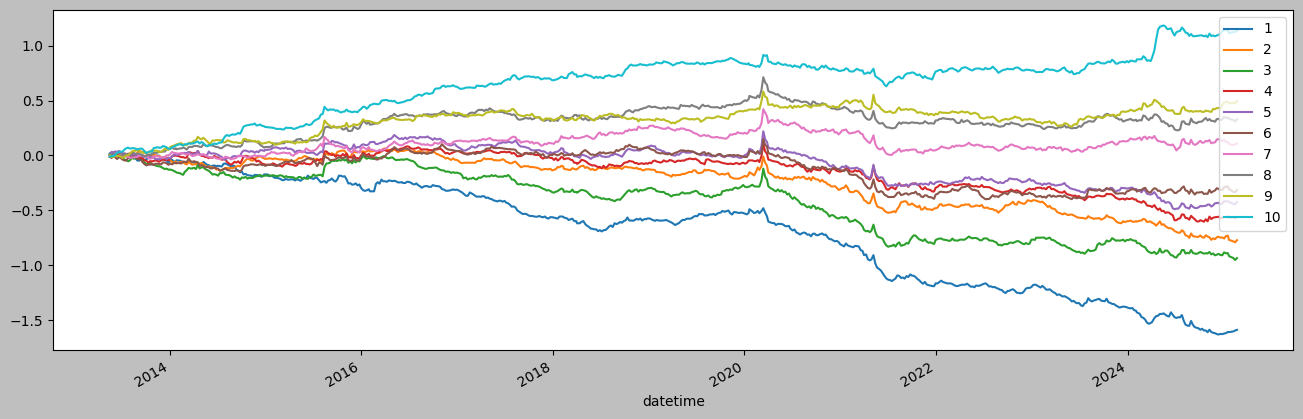

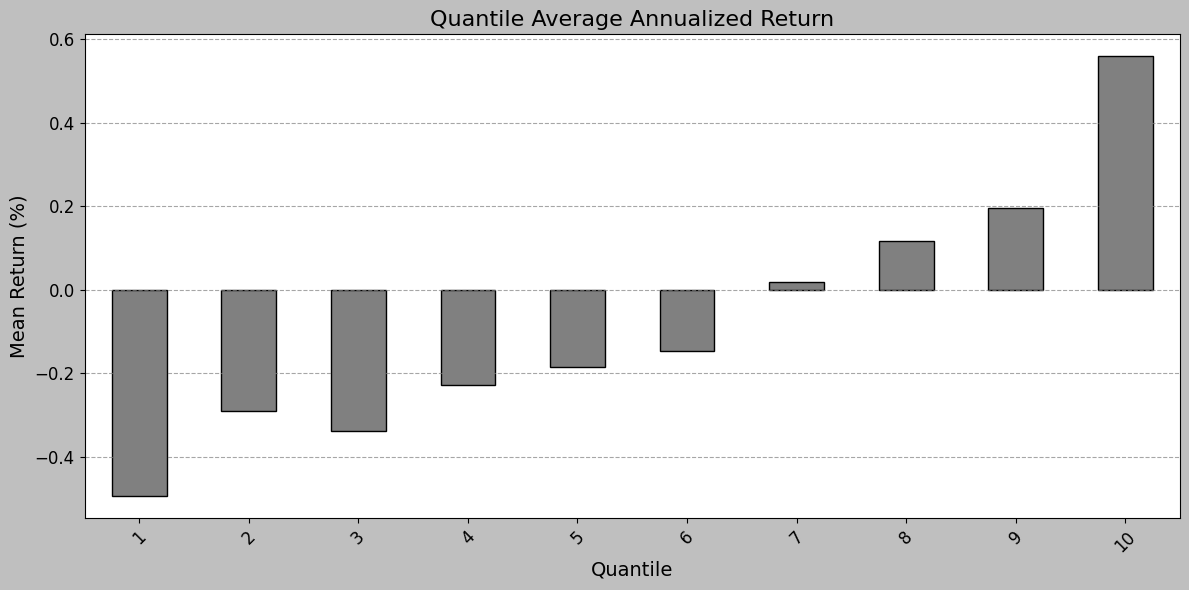

In [297]:
quantile_return=factor_valuation.get_quantile_return_ted(rank_range_n=10)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
quantile_return.cumsum().plot(ax=ax, color=color_list)
plt.legend()
plt.show()

factor_valuation.quantile_return_his(quantile_return)

/Users/chieray/TMBA-ATD-coding/因子研究/python/alpha_researcher.py:584: RuntimeWarning: Mean of empty slice
  demeanded = self.factor_df - np.nanmean(self.factor_df,axis=1)[:,None]
/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_18484/1767298708.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


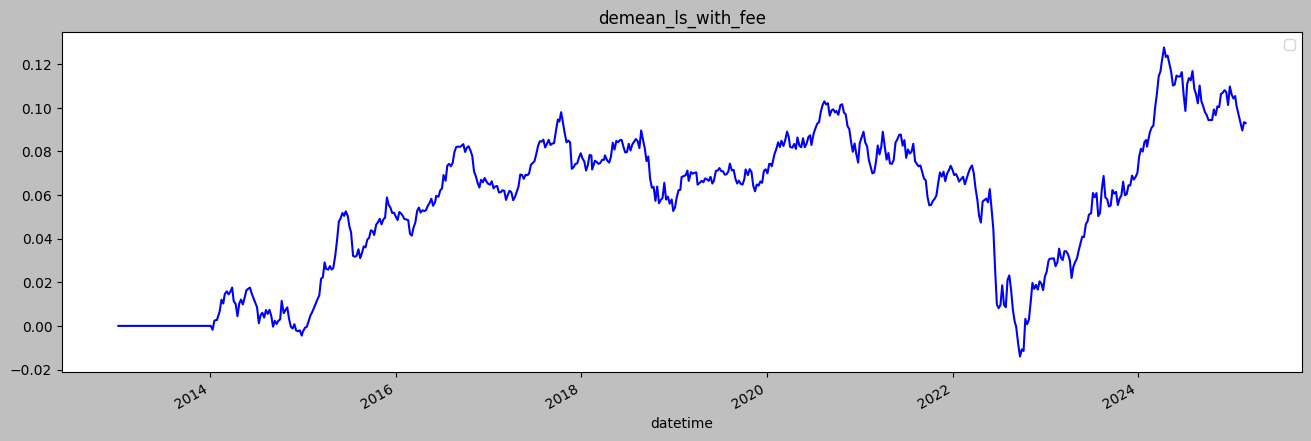

0.27644038347694055


In [192]:
demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=buy_fee, sell_fee=sell_fee,intraday = False)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
demean_ls_se.cumsum().plot(ax=ax,color='blue')
ax.set_title("demean_ls_with_fee")
plt.legend()
plt.show()
print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(52))

In [155]:
print('含手續費')
table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)

含手續費
StartTime: 2013-01-04 00:00:00, EndTime: 2025-03-06 00:00:00


,Prod Ret,Sum Ret,CAGR,Sharpe,Carmar,MDD,Max MDD period,Volatility,STD,Win Rate,Profit factor,Turnover,Time in market
Perform,21.22 %,19.56 %,0.02 %,0.71,0.00,-4.09 %,154.00,2.29 %,0.32 %,55.48 %,1.31,7.82 %,88.69 %


/Users/chieray/TMBA-ATD-coding/因子研究/python/alpha_researcher.py:584: RuntimeWarning: Mean of empty slice
  demeanded = self.factor_df - np.nanmean(self.factor_df,axis=1)[:,None]
/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_18484/1092858882.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


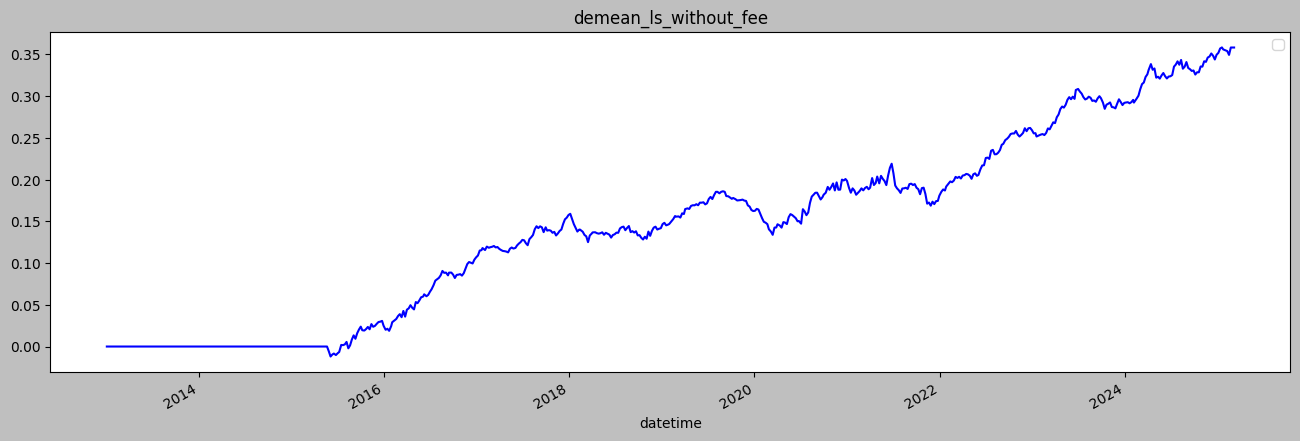

1.1163458548255993


In [44]:
demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=0, sell_fee=0,intraday = False)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
demean_ls_se.cumsum().plot(ax=ax,color='blue')
ax.set_title("demean_ls_without_fee")
plt.legend()
plt.show()
print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(52))

In [45]:
print('不含手續費')
table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)

不含手續費
StartTime: 2013-01-04 00:00:00, EndTime: 2025-03-06 00:00:00


,Prod Ret,Sum Ret,CAGR,Sharpe,Carmar,MDD,Max MDD period,Volatility,STD,Win Rate,Profit factor,Turnover,Time in market
Perform,42.47 %,35.83 %,0.03 %,1.12,0.01,-5.22 %,61.00,2.66 %,0.37 %,59.24 %,1.56,4.70 %,80.10 %


/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_18484/3313113708.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


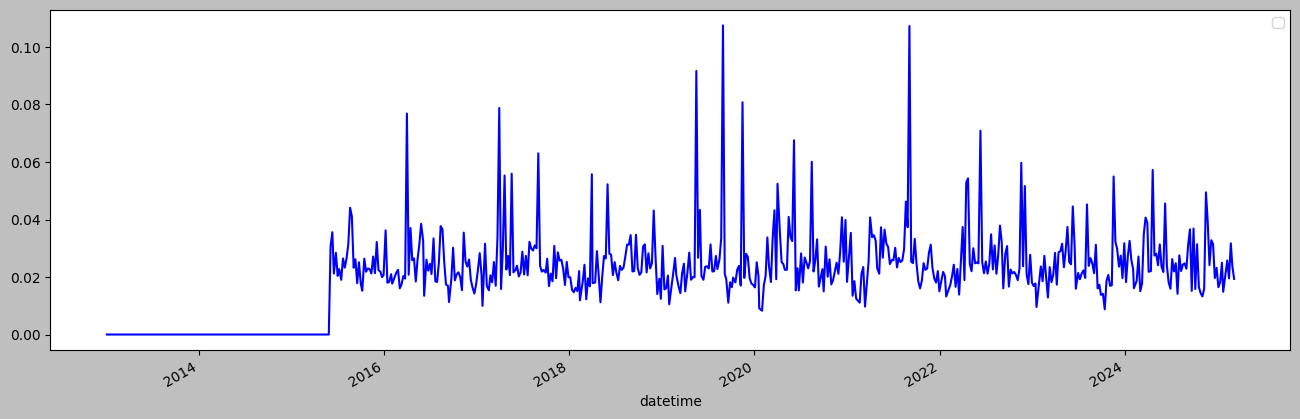

0.020474934395835538


In [46]:
delta_demean_ls_w=demean_ls_w.diff()
daily_trading_value = delta_demean_ls_w.abs().sum(axis=1)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
daily_trading_value.plot(ax=ax,color='blue')
plt.legend()
plt.show()

print(daily_trading_value.sum() / len(daily_trading_value))

In [42]:
icir=factor_valuation.get_ic_ir(periods=[1, 5, 10, 22,63,126])
icir=pd.DataFrame(icir)
icir

,1_days,5_days,10_days,22_days,63_days,126_days
IC,0.006931,0.015502,0.020343,0.028217,0.041711,0.053095
IR,0.086652,0.184634,0.242488,0.317467,0.450158,0.576457


# 自我放棄區

# 合成因子

In [334]:
factor_dict={}

factor_dict={#'流動性波動':(resample_to_period(Handler['factor:流動性波動'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=False),}
             #'靜態市盈率':(resample_to_period(Handler['factor:靜態市盈率'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),
             #'投信持倉市值':(resample_to_period(Handler['factor:投信持倉市值'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),
             #'銷售創高增長':(resample_to_period(Handler['factor:銷售創高增長'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),
             #'投信月正向流入占流通市值比':(resample_to_period(Handler['factor:投信月正向流入占流通市值比'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),
             '銷售增長與庫存增長之差':(resample_to_period(Handler['factor:銷售增長與庫存增長之差'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}
             #'資產周轉率變化':(resample_to_period(Handler['factor:資產周轉率變化'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}
             #'長短均線比值':(resample_to_period(Handler['factor:長短均線比值'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}
             #'sharpe':(resample_to_period(Handler['factor:sharpe'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}
             #'企業價值倍數':(resample_to_period(Handler['factor:企業價值倍數'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}
             #'dividend_quality':(resample_to_period(Handler['factor:dividend_quality'],period=period))[portfolio_pool_周].rank(axis=1,pct=True,ascending=True),}

factor_df=pd.concat(factor_dict,axis=1).loc['2016':]

In [335]:
Mega_Factor = pd.DataFrame(0, index=factor_df.index, columns=factor_df.columns.levels[1])

# Iterate over each factor (first level) and add the filled values to Mega_Factor
for factor in factor_df.columns.levels[0]:
    # Extract the subset for the current factor and fill NaN values with 0
    factor_data = factor_df[factor].fillna(0)
    # Add the current factor's data to Mega_Factor
    Mega_Factor += factor_data
Mega_Factor=Mega_Factor.replace(0, np.nan)

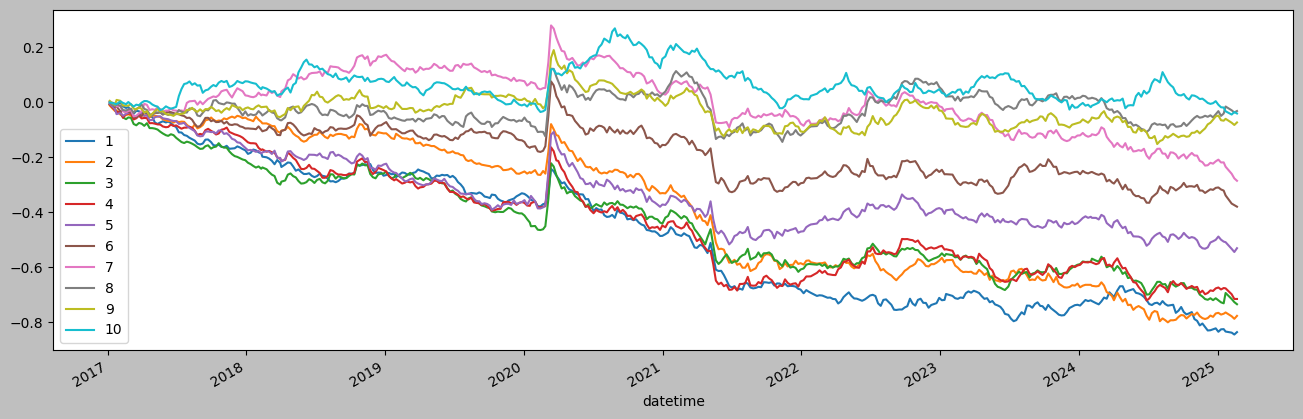

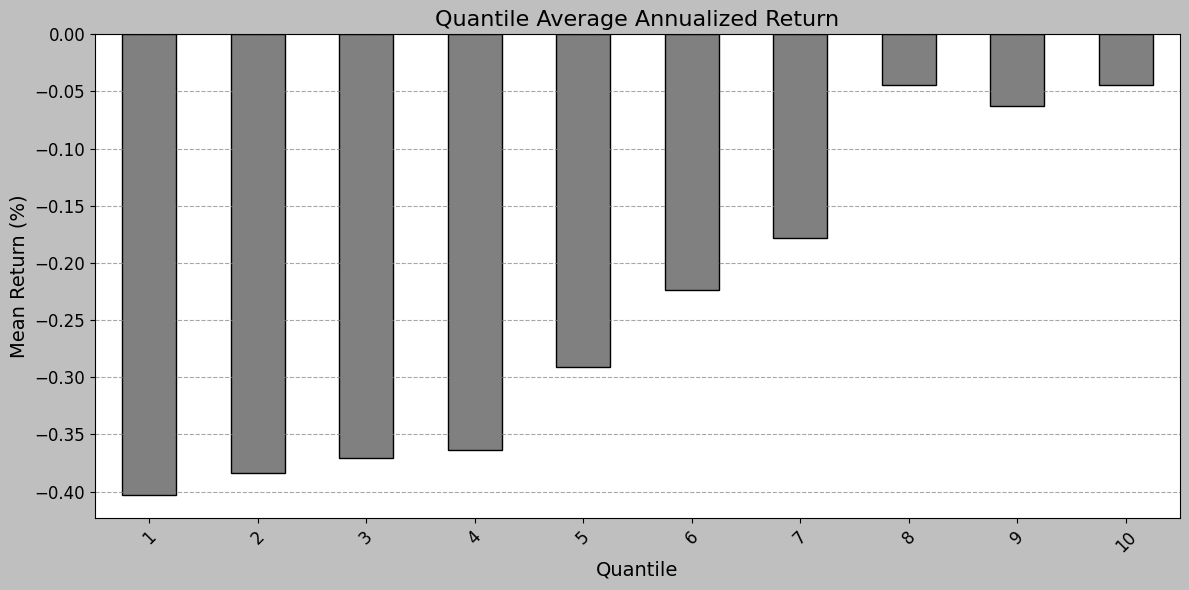

/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_18484/2034166731.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


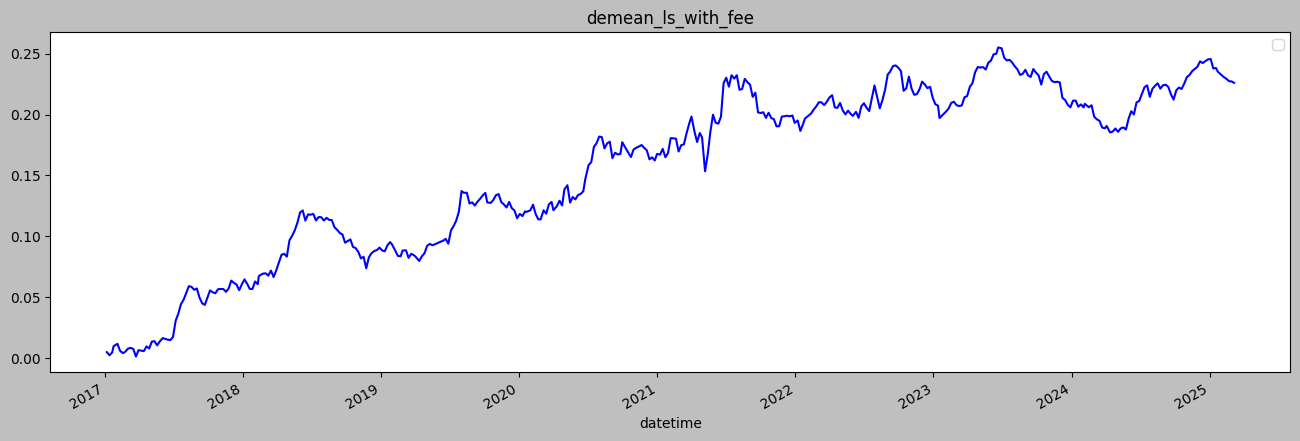

0.6939412478462388


In [336]:
factor_valuation=alpha_researcher.factor_valuation(factor_df=Mega_Factor[portfolio_pool_周].loc['2017':],return_df=周頻率預期收益率[portfolio_pool_周].loc['2017':],period=52)

###十分位數檢定
quantile_return=factor_valuation.get_quantile_return_ted(rank_range_n=10)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
quantile_return.cumsum().plot(ax=ax, color=color_list)
plt.legend()
plt.show()

factor_valuation.quantile_return_his(quantile_return)

####ls檢定
demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=buy_fee, sell_fee=sell_fee,intraday = False)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
demean_ls_se.cumsum().plot(ax=ax,color='blue')
ax.set_title("demean_ls_with_fee")
plt.legend()
plt.show()
print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(52))

In [277]:
factor_merge_valuation=alpha_researcher.factor_merge_valuation(factor_df,周頻率預期收益率[portfolio_pool_周],period=52)
demean_ls=factor_merge_valuation.calculate_demean_ls_returns( filter_condition=portfolio_pool_周,only_long=False)
ic_se=factor_merge_valuation.calculate_ic_series(filter_condition=portfolio_pool_周)
factor_merger=alpha_researcher.factor_merger(factor_df,demean_ls,ic_se)

In [281]:
def calculate_combine_factor_rolling(self, weights):
    if not isinstance(self.factor_merge.columns, pd.MultiIndex):
        raise ValueError("df必須有MultiIndex列結構")
    result = pd.DataFrame(index=self.factor_merge.index, columns=self.factor_merge.columns.get_level_values(1).unique())
    for column in result.columns:
        symbol = self.factor_merge.xs(column, axis=1, level=1, drop_level=True)
        symbol_bool = symbol.notna()
        if not weights.index.equals(symbol.index):
            weights = weights.reindex(symbol.index)
        if not weights.columns.equals(symbol.columns):
            weights = weights.reindex(columns=symbol.columns)
        symbol_weights = weights.where(symbol_bool)
        symbol_weights = symbol_weights.div(symbol_weights.sum(axis=1), axis=0)
        result_score = symbol.mul(symbol_weights)
        result[column] = result_score.sum(axis=1)
    return result.replace(0, np.nan)

In [278]:
rolling_icir=(ic_se.rolling(52).mean())/(ic_se.rolling(52).std())
Mega_Factor=factor_merger.calculate_combine_factor_rolling(rolling_icir)

# 評價因子＿全股池

In [43]:
#測試因子=abs(測試因子.sub(測試因子.median(axis=1),axis=0))

In [44]:
select_factor=測試因子.rank(axis=1,pct=True,ascending=True)

In [45]:
factor_valuation=alpha_researcher.factor_valuation(factor_df=select_factor,return_df=預期收益率＿日,period=252)

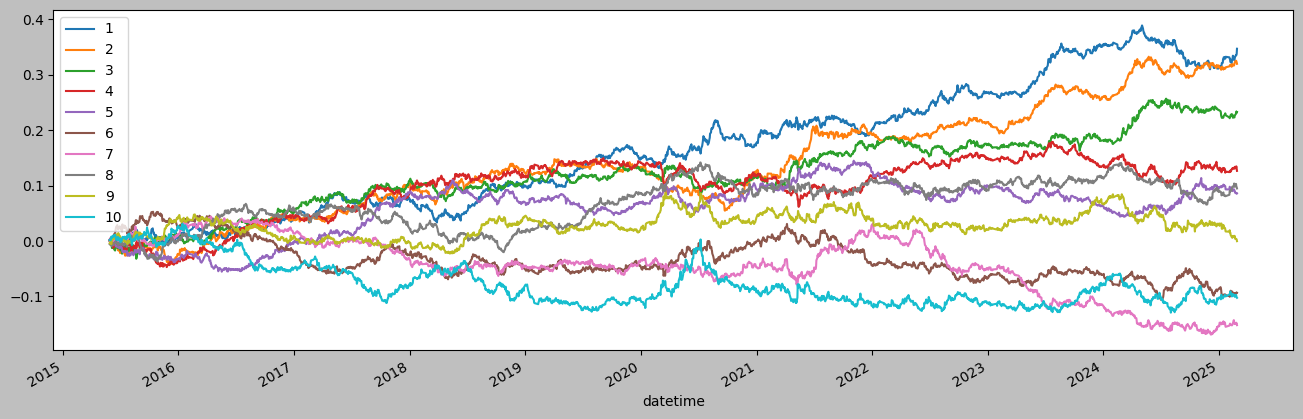

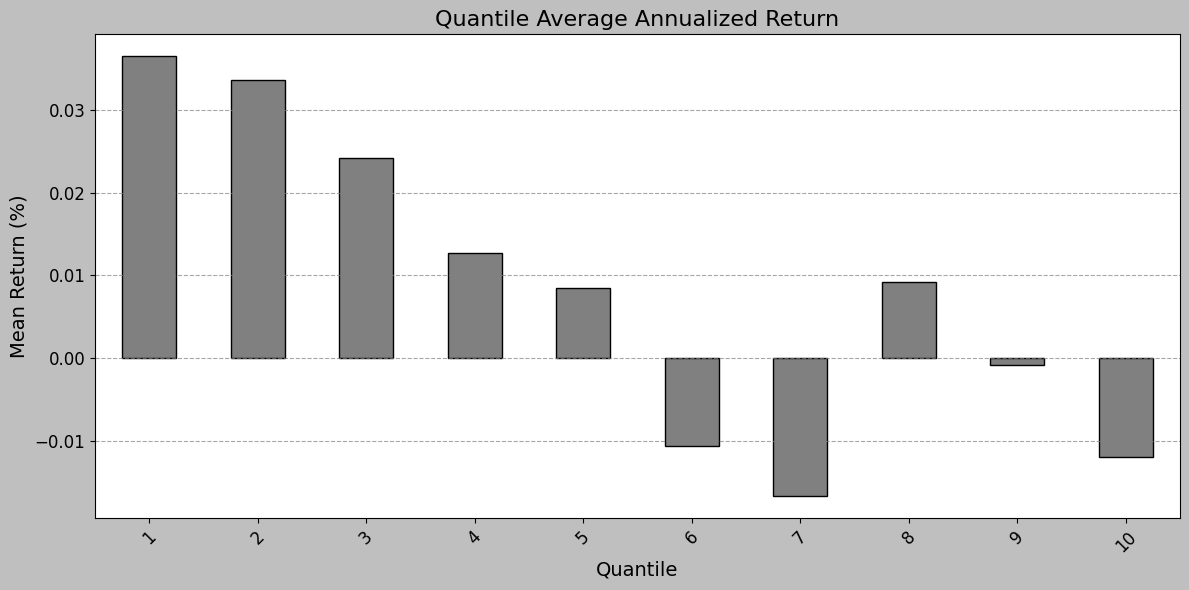

In [46]:
quantile_return=factor_valuation.get_quantile_return_ted(rank_range_n=10)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
quantile_return.cumsum().plot(ax=ax, color=color_list)
plt.legend()
plt.show()

factor_valuation.quantile_return_his(quantile_return)

/Users/chieray/TMBA-ATD-coding/因子研究/python/alpha_researcher.py:584: RuntimeWarning: Mean of empty slice
  demeanded = self.factor_df - np.nanmean(self.factor_df,axis=1)[:,None]
/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_2375/3241190458.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


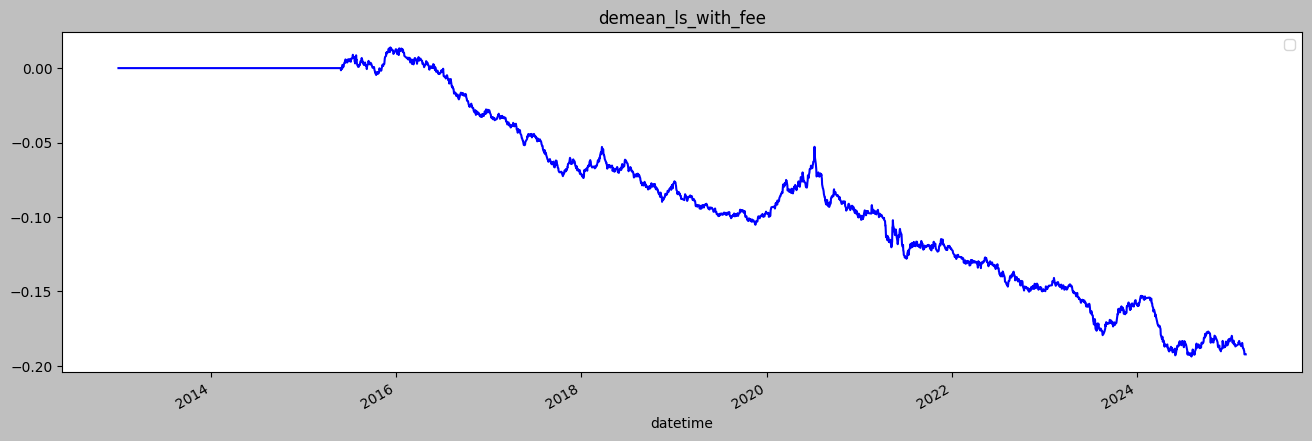

-0.9343386953278161


In [47]:
demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=buy_fee, sell_fee=sell_fee,intraday = False)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
demean_ls_se.cumsum().plot(ax=ax,color='blue')
ax.set_title("demean_ls_with_fee")
plt.legend()
plt.show()
print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(252))

In [48]:
print('含收續費')
table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)

含收續費
StartTime: 2013-01-02 00:00:00, EndTime: 2025-03-04 00:00:00


,Prod Ret,Sum Ret,CAGR,Sharpe,Carmar,MDD,Max MDD period,Volatility,STD,Win Rate,Profit factor,Turnover,Time in market
Perform,-17.65 %,-19.24 %,-0.02 %,-0.93,-0.00,-20.78 %,2246.00,1.75 %,0.11 %,46.24 %,0.84,0.43 %,80.20 %


/Users/chieray/TMBA-ATD-coding/因子研究/python/alpha_researcher.py:584: RuntimeWarning: Mean of empty slice
  demeanded = self.factor_df - np.nanmean(self.factor_df,axis=1)[:,None]
/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_2375/2644010176.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


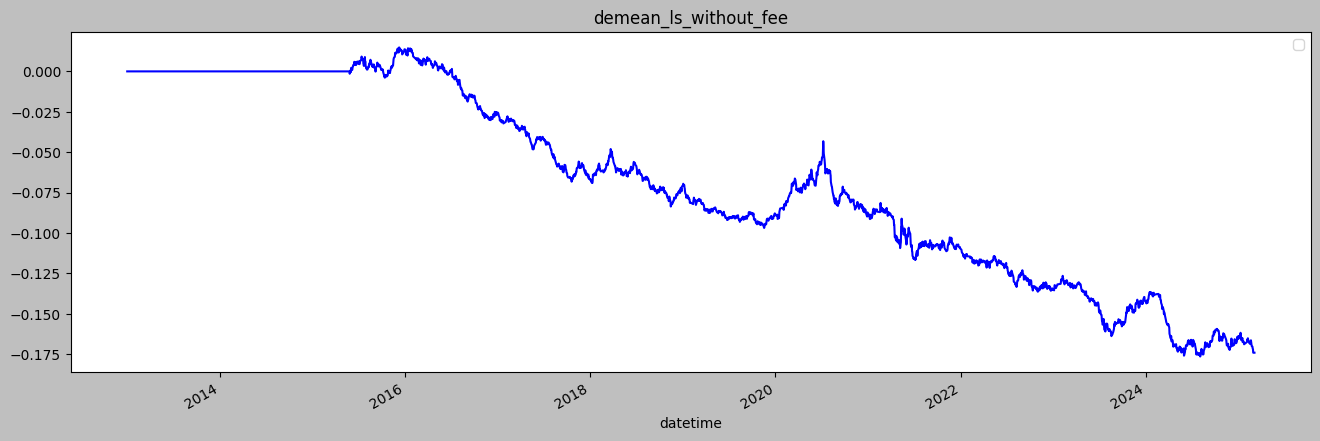

-0.8451079985440726


In [49]:
demean_ls_w=factor_valuation.factor_to_weight(only_long=False)
demean_ls_se=factor_valuation.get_strategy_return(demean_ls_w, buy_fee=0, sell_fee=0,intraday = False)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
demean_ls_se.cumsum().plot(ax=ax,color='blue')
ax.set_title("demean_ls_without_fee")
plt.legend()
plt.show()
print(demean_ls_se.mean()/demean_ls_se.std()*np.sqrt(252))

In [50]:
print('不含收續費')
table=factor_valuation.calculate_metrics_ted(demean_ls_se, demean_ls_w)

不含收續費
StartTime: 2013-01-02 00:00:00, EndTime: 2025-03-04 00:00:00


,Prod Ret,Sum Ret,CAGR,Sharpe,Carmar,MDD,Max MDD period,Volatility,STD,Win Rate,Profit factor,Turnover,Time in market
Perform,-16.12 %,-17.40 %,-0.01 %,-0.85,-0.00,-19.12 %,2246.00,1.75 %,0.11 %,46.70 %,0.86,0.43 %,80.13 %


/var/folders/x2/75yr957x4dv95sfg2x05yf980000gn/T/ipykernel_2375/3313113708.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


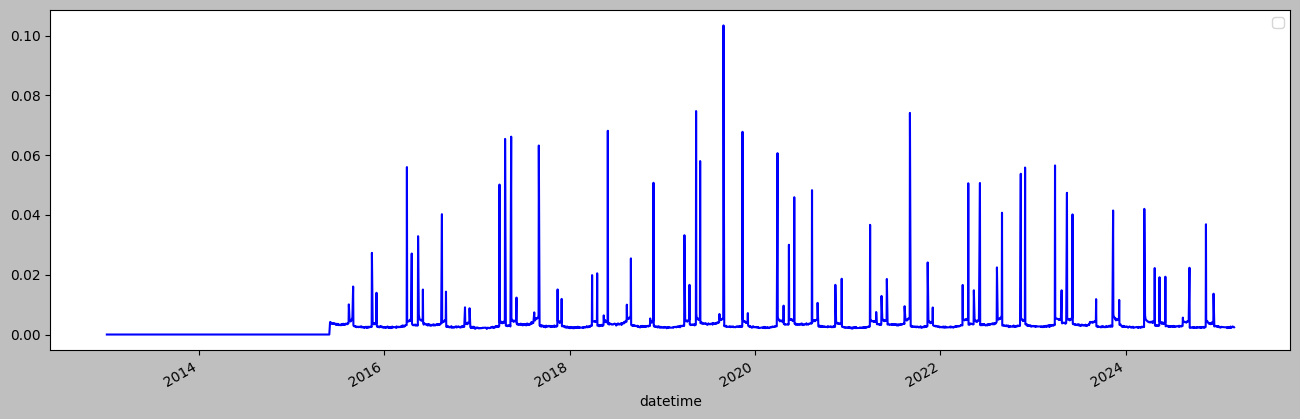

0.003289437912764176


In [51]:
delta_demean_ls_w=demean_ls_w.diff()
daily_trading_value = delta_demean_ls_w.abs().sum(axis=1)

plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(16, 5))
daily_trading_value.plot(ax=ax,color='blue')
plt.legend()
plt.show()

print(daily_trading_value.sum() / len(daily_trading_value))

In [52]:
icir=factor_valuation.get_ic_ir(periods=[1, 5, 10, 22,63,126])
icir=pd.DataFrame(icir)
icir

,1_days,5_days,10_days,22_days,63_days,126_days
IC,-0.002907,-0.006553,-0.009269,-0.013892,-0.023681,-0.033251
IR,-0.067395,-0.142436,-0.194616,-0.283725,-0.492184,-0.708616


# fama macbeth

In [ ]:
data=pd.concat({'y':預期收益率＿月[portfolio_pool].stack(),
                'cash_dividend_yield ':cash_dividend_yield[portfolio_pool].stack(),
                'operation_stability_daily':operation_stability_daily[portfolio_pool].stack(),
                'roe_df':roe_df[portfolio_pool].stack(),
                'price_mom':price_mom[portfolio_pool].stack(),
                'profitability':profitability[portfolio_pool].stack(),
                'dividend_quality':dividend_quality[portfolio_pool].stack(),
                'ocf_ratio':ocf_ratio[portfolio_pool].stack(),
                'volatility':volatility[portfolio_pool].stack(),},axis=1)

data=data.dropna()

In [966]:
#factor_valuation.operate_fama_macbeth(data)